**ML MODEL FOR CLASSIFICATION AND DETECTION OF PCOS IN A FEMALE BASED ON DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Data source:  https://www.kaggle.com/code/mahikkaaa/pcos-prediction-and-analysis/input

In [2]:
from google.colab import files
uploaded=files.upload()
df = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name=1)
df.head(7)


Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.304017,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
5,6,6,0,36,74.1,165.0,27.217631,15,78,28,...,0.0,0,110,70,9,6,16.0,20.0,8.0,NaN
6,7,7,0,34,64.0,156.0,26.298488,11,72,18,...,0.0,0,120,80,6,6,15.0,16.0,6.8,NaN


In [3]:
#count rows and columns in dataset
df.shape

(541, 45)

**Understanding the Dataset**

Patient File No. : Report number which has data for a particular patient. This column will later be removed

PCOS : Polycystic ovary syndrome. This is the target class.

Age (yrs) : Age of patient(yrs)

Weight (Kg) : Weight of patient(kg)

Height(Cm) : Height of patient(cms)

BMI : Body mass index of the patient(kg/cm^2)

Blood Group :A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups- the integers are chosen according to the dataset)

Pulse rate(bpm) : Heart Rate of patient in beats per minute. Normally, it is 60 to 100 bpm for an average adult

RR (breaths/min) : Respiration rate. Normally it is 12 to 16 breaths/min.

Hb(g/dl) : Haemoglobin level in gram per deciliter. Normally 12 gm/dL and 15 gm/dL for females.

Cycle length(days) : Length of menstrual cycles. Usually 28-35 days.

Marraige Status (Yrs) : Years of marriage. 0 if unmarried.

Pregnant(Y/N) : 1 if pregnant.0 if not pregnant.

No. of aborptions : No. of aborptions. 0 if no. abortions.

I beta-HCG(mIU/mL) : Case 1 of beta hcg

II beta-HCG(mIU/mL) : Case 2 of beta hcg in mili International Units per miliLiter (Beta hCG level < 5 mIU/mL =>negative for pregnancy, >=25 mIU/mL=> good for pregnancy)

FSH(mIU/mL) : Follicle-stimulating hormone.
During puberty:0.3 to 10.0 mIU/mL
 Women who are still menstruating: 4.7 to 21.5 mIU/mL
 After menopause: 25.8 to 134.8 mIU/mL

LH(mIU/mL) : Luteinizing Hormone.

FSH/LH : Ratio of FSH and LH. This column is removed from the table.

Hip(inch) : Hip size in inches

Waist(inch) : Waist Size in inches

Waist:Hip Ratio : Waist by hip ratio. Removed from table.

TSH (mIU/L) : Thyroid stimulating hormone. Normally 0.4 to 4.0 mIU/L

AMH(ng/mL) :Anti-Mullerian Hormone.

PRL(ng/mL) :Prolactin levels.

Vit D3 (ng/mL): Vitamin D levels. Normally >=20 ng/ml.

PRG(ng/mL): Progesterone levels

RBS(mg/dl): Random Blood Sugar (RBS) Test.

Weight gain(Y/N): 1 for weight gain. 0 for no weight gain.

hair growth(Y/N): 1 for hair growth. 0 for no hair growth.

Skin darkening (Y/N): 1 for Skin darkening.0 for no Skin darkening experienced.

Hair loss(Y/N): 1 for hair loss.0 for no hair loss experienced.

Pimples(Y/N): 1 for acne.0 for no acne.

Fast food (Y/N): 1 if you consume fast food on a daily basis.

Reg.Exercise(Y/N): 1 if you exercise regularly.

BP _Systolic (mmHg): Pressure in your arteries when your heart beats.

BP _Diastolic (mmHg): Pressure in your arteries when your heart rests between beats.

Follicle No. (L): Follicles in left.

Follicle No. (R): Follicles in right.

Avg. F size (L) (mm): Average Follicle size in left (mm)

Avg. F size (R) (mm): Average Follicle size in right(mm)

Endometrium (mm): thickness of endometrial lining (mm)

In [4]:
df.isna().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


Remove:
*   Sl. No
*   Patient File No.
*   unnamed

Target:PCOS (Y/N)

In [6]:
df = df.drop(['Sl. No', 'Patient File No.','Unnamed: 44'], axis=1)

In [7]:
df['PCOS (Y/N)'].value_counts()

,count
PCOS (Y/N),
0,364
1,177


In [8]:
(177/(177+364))*100

32.71719038817005

Therefore, 32.7% of patients in data table have PCOS.

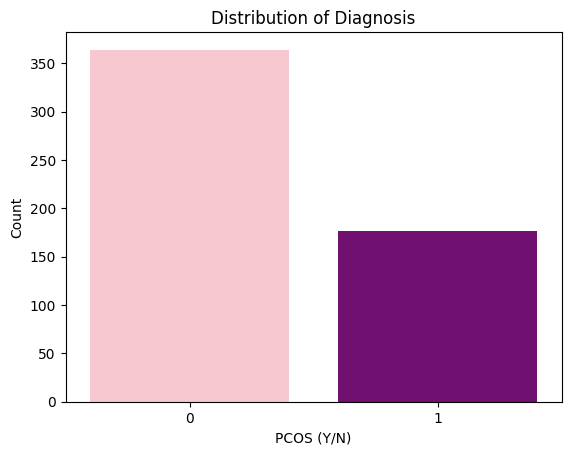

In [10]:
# Now, visualizing the count...
colors = { '0': 'pink', '1': 'purple'}  # Add colors for '0' and '1'

# Now, visualizing the count...
sns.countplot(x='PCOS (Y/N)', data=df, palette=colors)
plt.xlabel('PCOS (Y/N)')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()

In [11]:
df.dtypes


,0
PCOS (Y/N),int64
Age (yrs),int64
Weight (Kg),float64
Height(Cm),float64
BMI,float64
Blood Group,int64
Pulse rate(bpm),int64
RR (breaths/min),int64
Hb(g/dl),float64
Cycle(R/I),int64


In [12]:
# Columns AMH(ng/mL) and II    beta-HCG(mIU/mL) are of dat type object. This may cause problems later.
#first trim the column names, since that is giving errors.
df = df.rename(columns=lambda x: x.strip())
# Therefore, Converting them to numeric data type:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce")

In [13]:
#check missing values again:
df.isna().sum()

,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle(R/I),0


In [14]:
#"FSH/LH" and "Waist:Hip Ratio" has 532 missing values
#"AMH(ng/mL)", "Fast food (Y/N)" has 1 missing value
#we need to drop columns "FSH/LH" and "Waist:Hip Ratio"
df = df.drop(['FSH/LH', 'Waist:Hip Ratio'], axis=1)

In [15]:
#Listing columns with missing data:
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

['Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

In [16]:
# Filling missing values with the mean
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].mean())  # Filling columns with missing values with their mean

In [17]:
#Listing columns with missing data now:
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

[]

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,0]=labelencoder_Y.fit_transform(df.iloc[: ,0].values)
df.iloc[:,0]                 #Yes = 1 ; No= 0

,PCOS (Y/N)
0,0
1,0
2,1
3,0
4,0
...,...
536,0
537,0
538,0
539,0


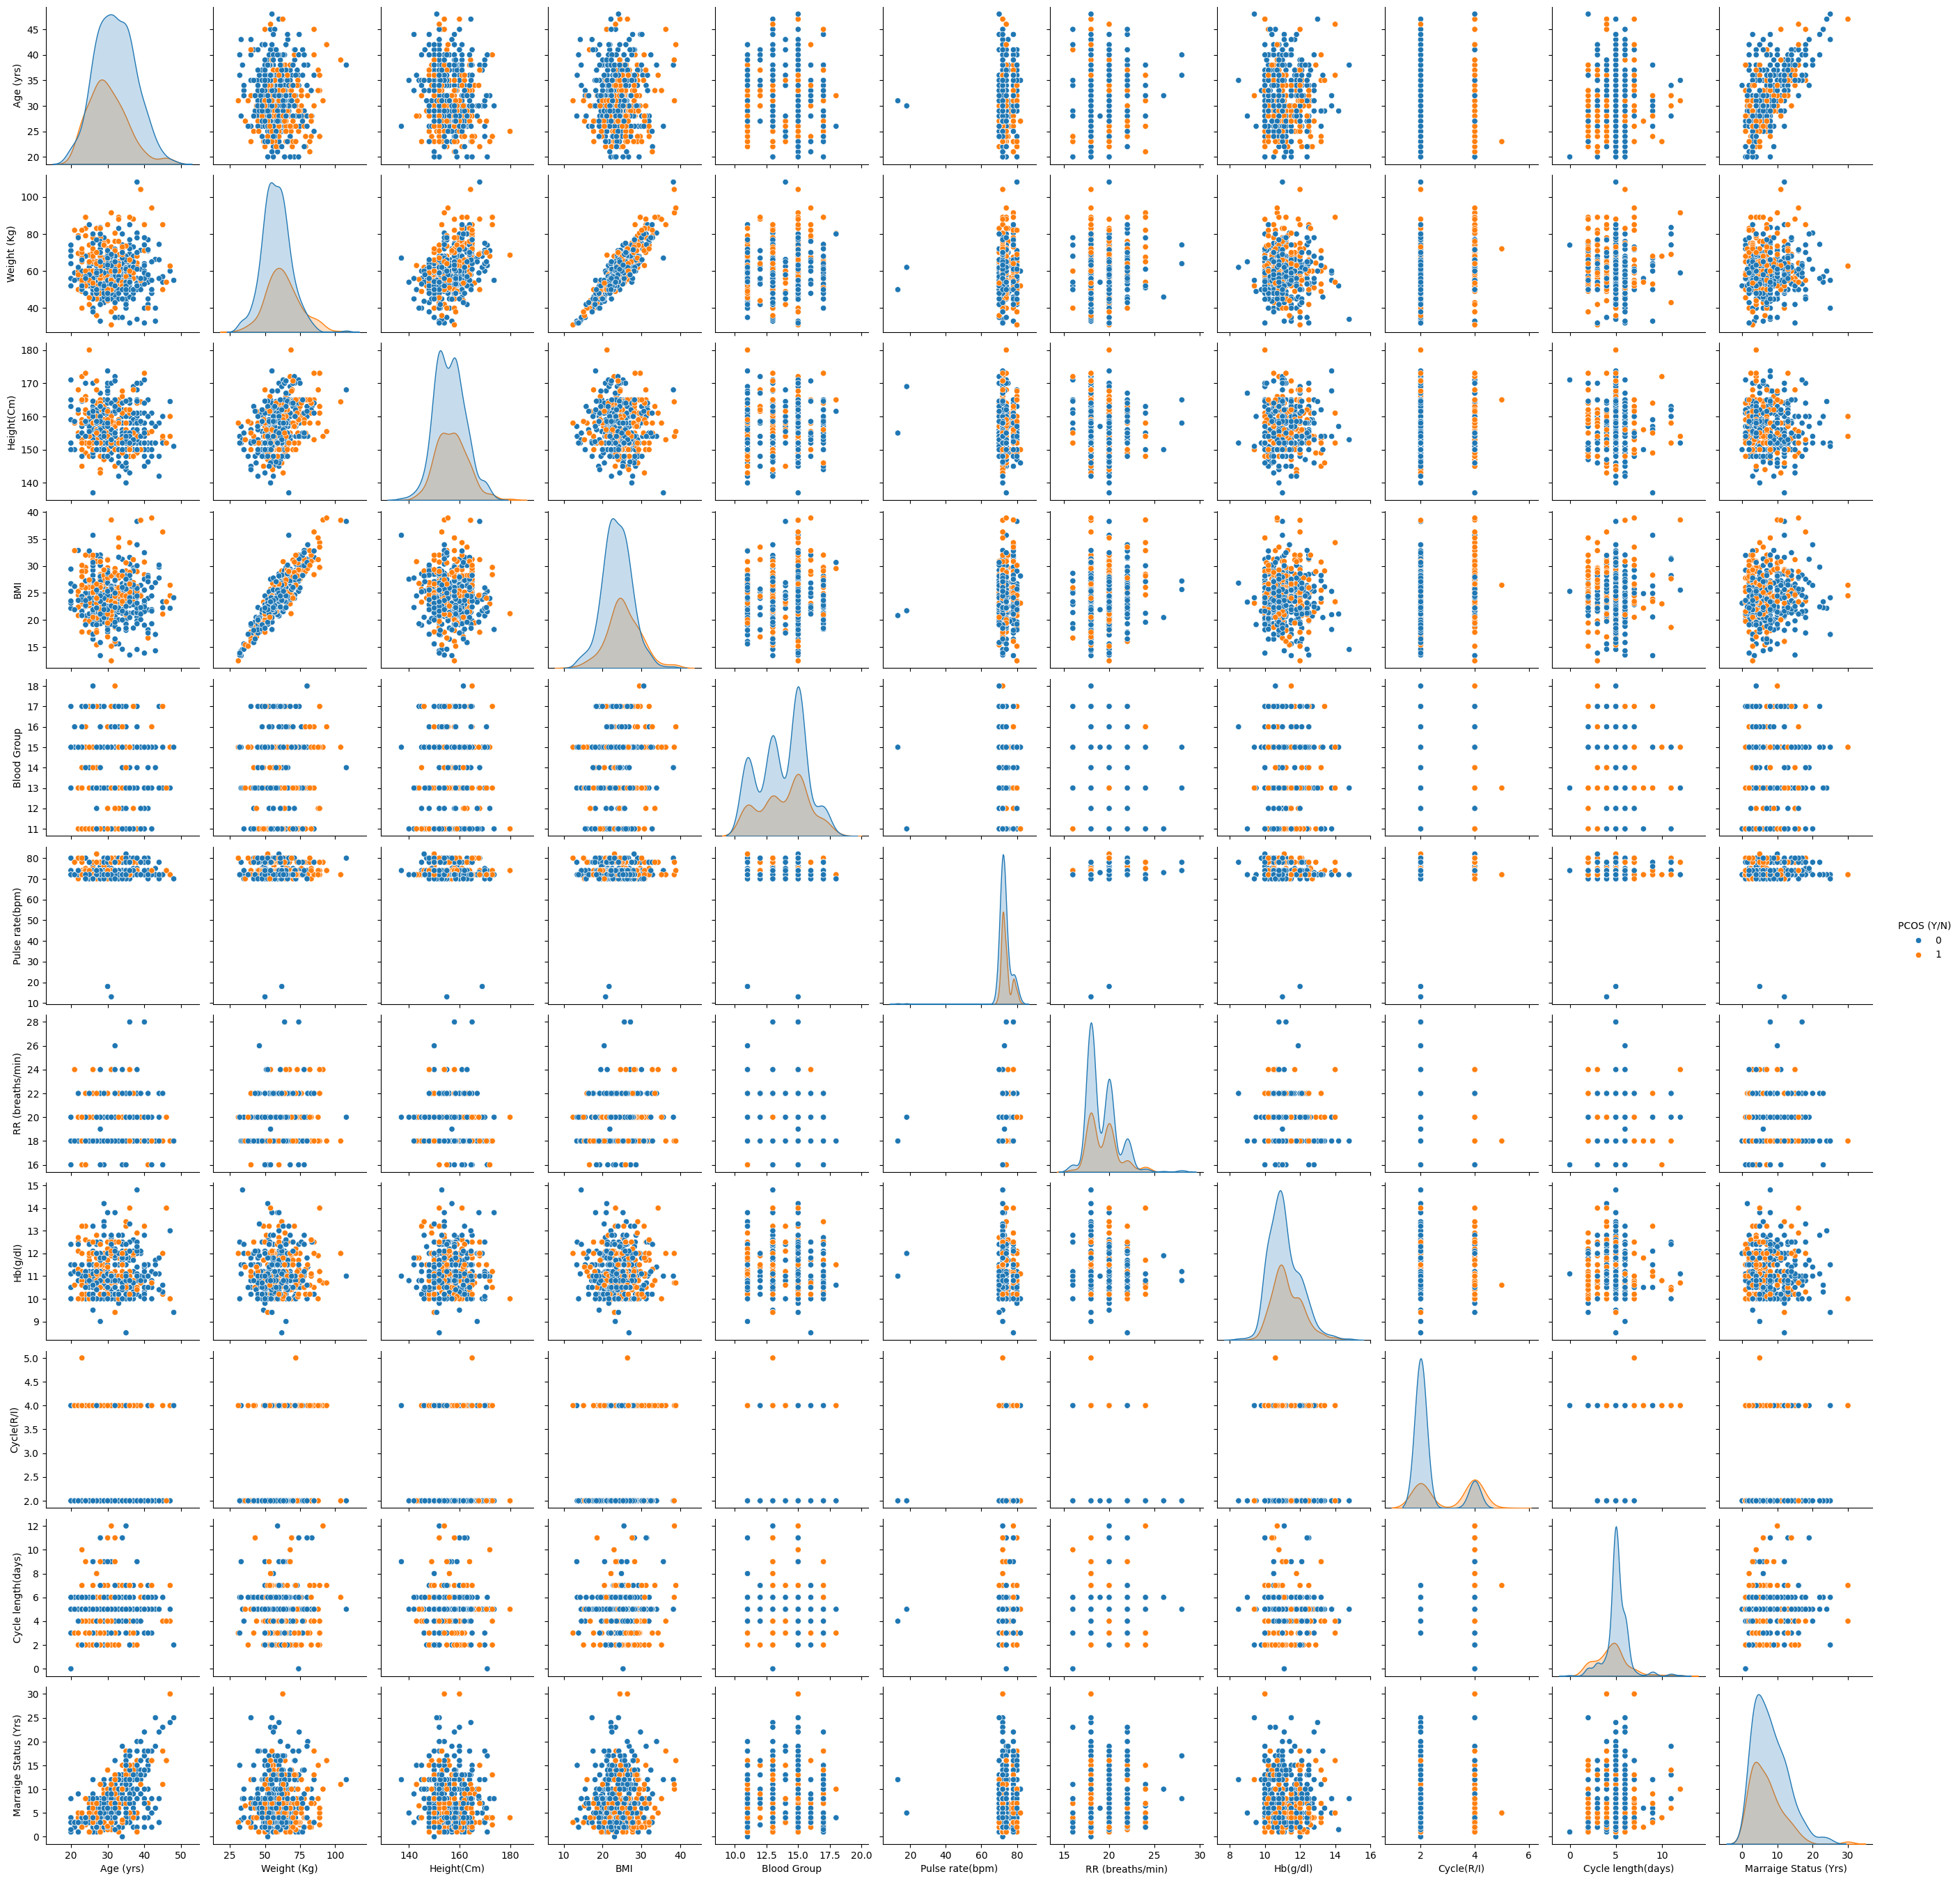

In [ ]:
#create a pairplot..for understanding

sns.pairplot(df.iloc[:,0:12],hue='PCOS (Y/N)')

In [19]:
#get correlation of columns
# Select only numeric columns
df = df.select_dtypes(include='number')

df.corr()


,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.168513,0.211938,0.068254,0.200176,0.036433,0.091821,0.036928,0.087170,0.401644,...,0.286077,0.377763,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),-0.168513,1.000000,-0.029734,-0.119819,0.018918,-0.010954,0.045831,0.087382,-0.021558,-0.085943,...,-0.032921,-0.037670,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),0.211938,-0.029734,1.000000,0.420098,0.902205,0.072682,0.019983,0.043614,0.009594,0.200758,...,0.063983,0.161964,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),0.068254,-0.119819,0.420098,1.000000,-0.006224,0.040825,-0.074339,-0.029459,0.024378,-0.017336,...,0.061129,0.032416,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,0.200176,0.018918,0.902205,-0.006224,1.000000,0.060230,0.050717,0.062258,0.003260,0.233263,...,0.045502,0.160473,-0.078554,0.067957,0.137606,0.144146,0.105277,-0.010298,-0.112197,0.010682
Blood Group,0.036433,-0.010954,0.072682,0.040825,0.060230,1.000000,0.047572,-0.023766,-0.001759,0.123724,...,0.039029,-0.035084,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),0.091821,0.045831,0.019983,-0.074339,0.050717,0.047572,1.000000,0.303804,-0.052048,0.101006,...,-0.003039,0.059800,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),0.036928,0.087382,0.043614,-0.029459,0.062258,-0.023766,0.303804,1.000000,-0.040487,0.018324,...,0.029242,0.135143,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930
Hb(g/dl),0.087170,-0.021558,0.009594,0.024378,0.003260,-0.001759,-0.052048,-0.040487,1.000000,0.036683,...,0.053794,0.076252,0.011643,0.053020,0.000606,0.061195,0.072958,0.032617,0.024335,-0.066446
Cycle(R/I),0.401644,-0.085943,0.200758,-0.017336,0.233263,0.123724,0.101006,0.018324,0.036683,1.000000,...,0.121380,0.205574,-0.004989,0.054910,0.081345,0.296518,0.251575,0.033450,0.016007,0.043614


<Axes: >

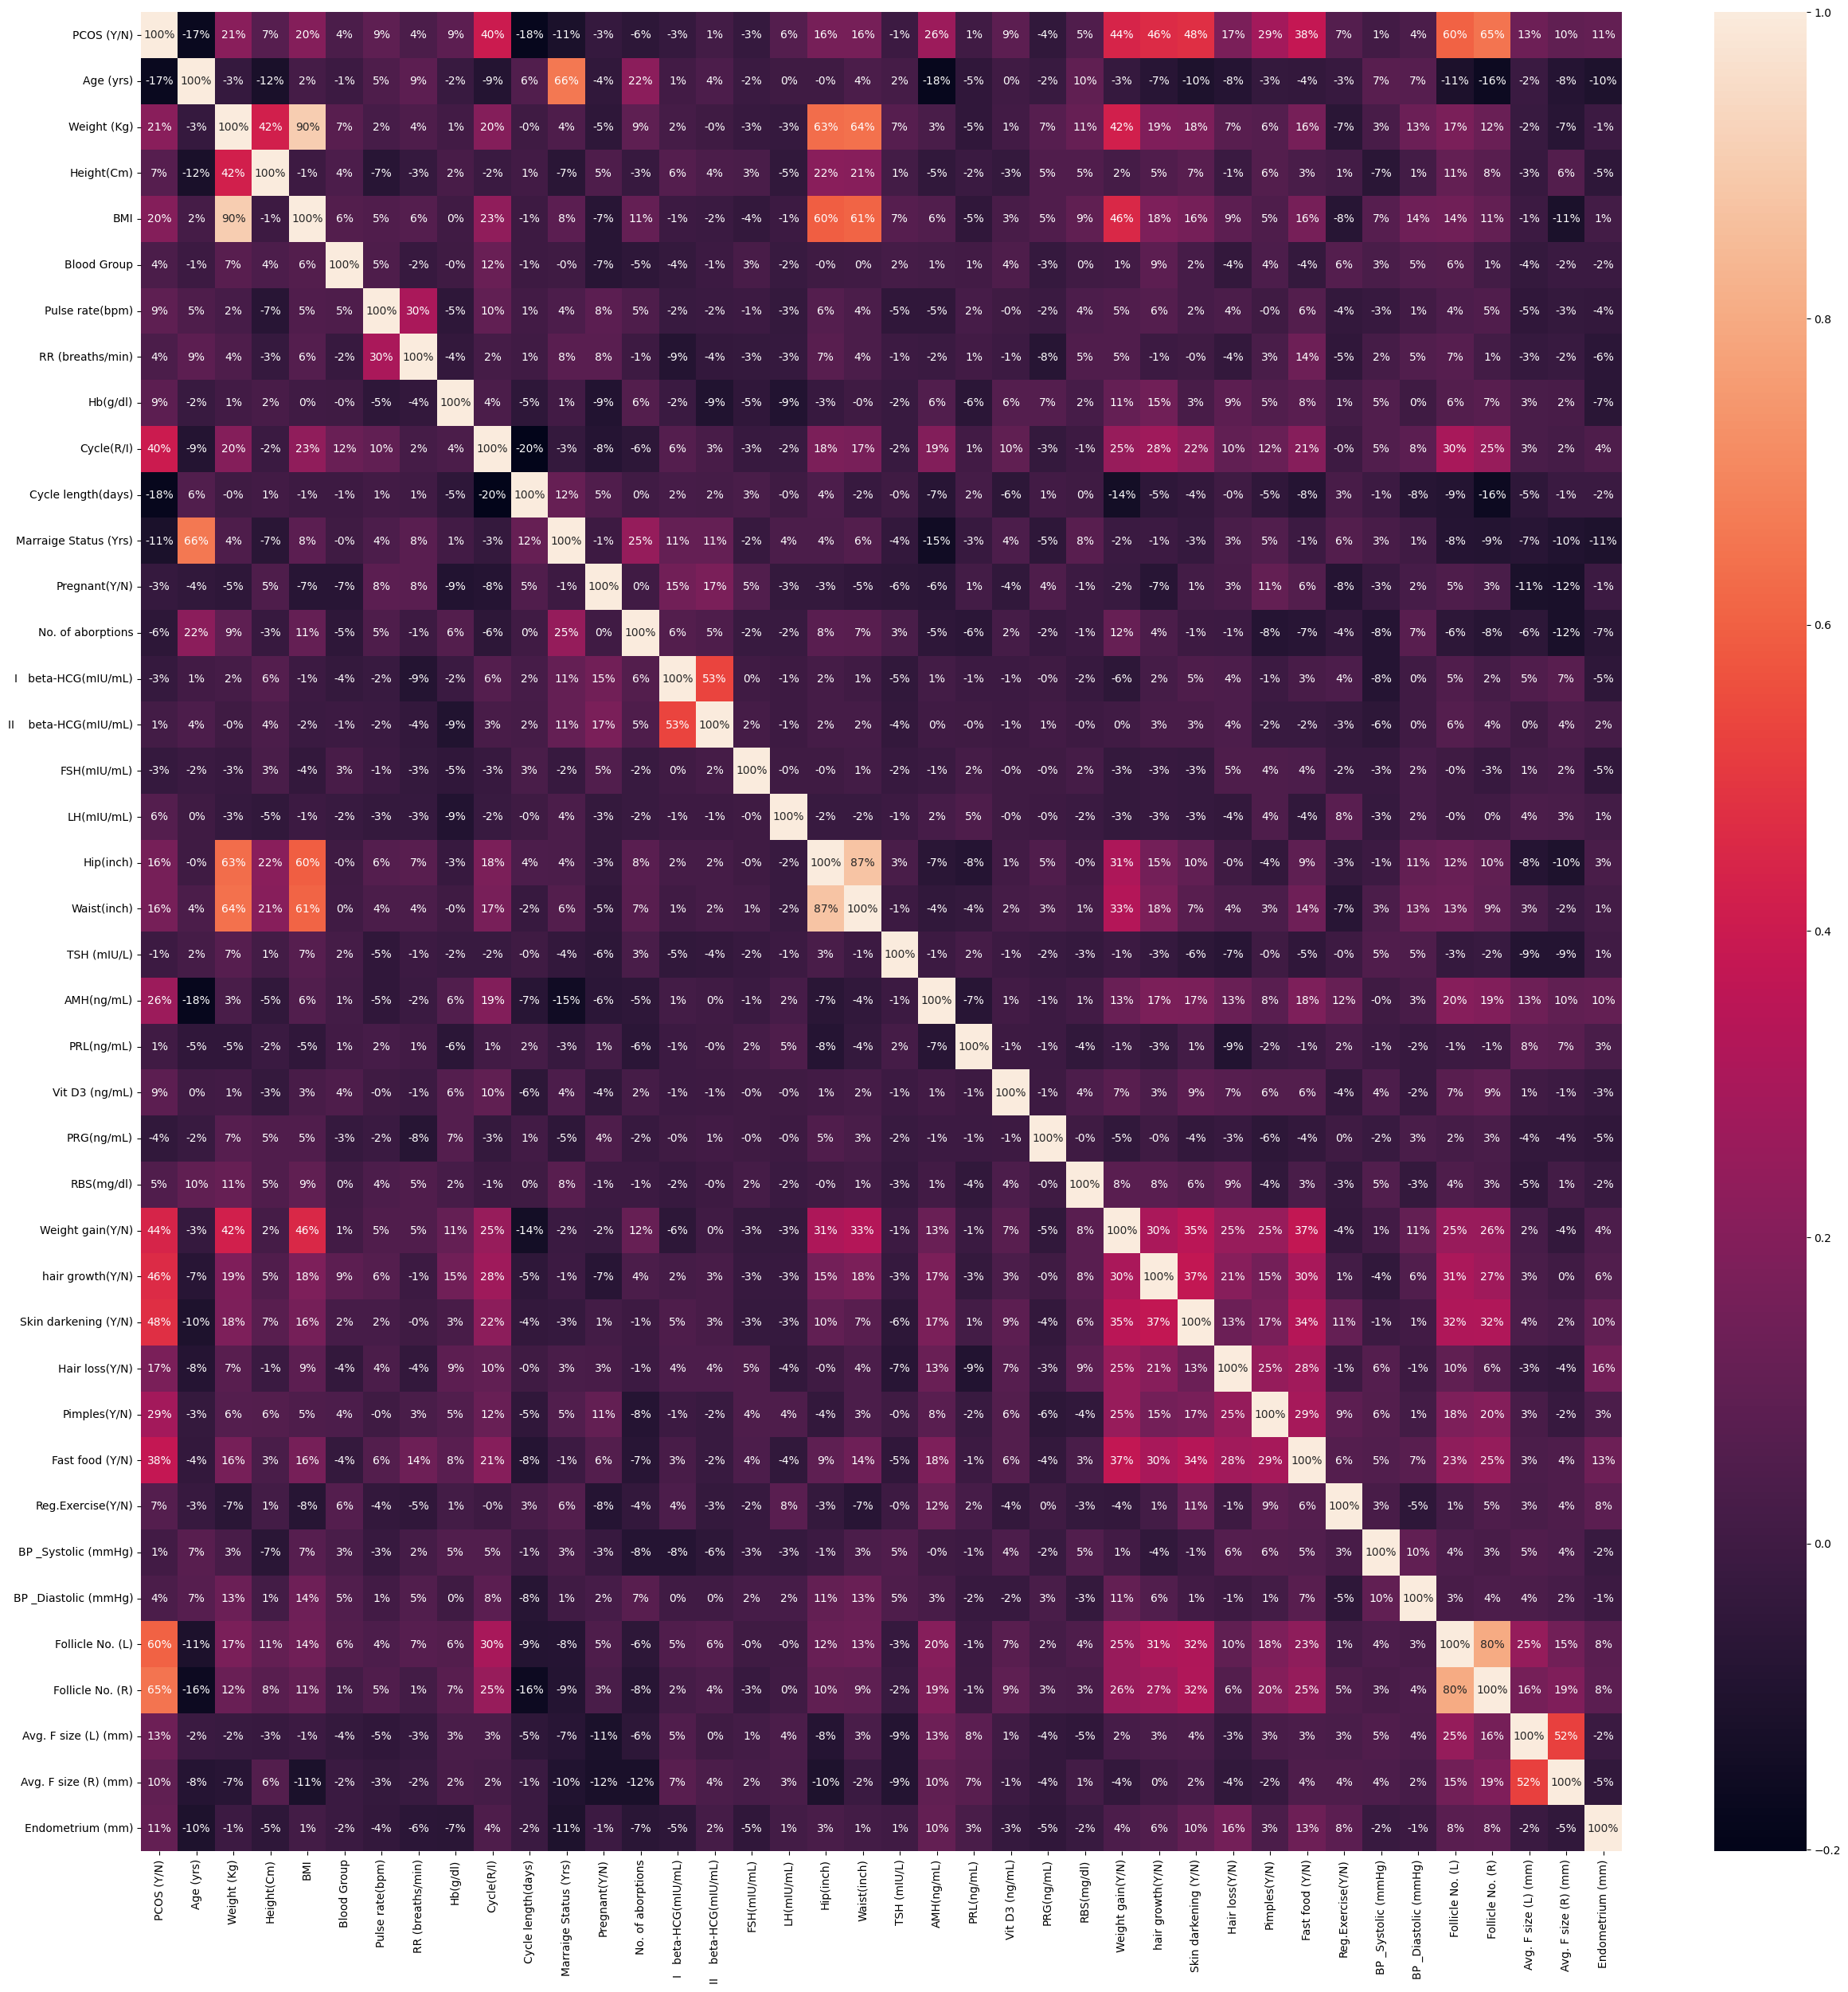

In [20]:
#visualize correlation
plt.figure(figsize=(30,30))
sns.heatmap(df.iloc[:,0:].corr(), annot=True,fmt='.0%')

In [21]:
#Checking how different features are correlated to PCOS
df.corr()["PCOS (Y/N)"].sort_values(ascending=True) #sorting in ascending order

,PCOS (Y/N)
Cycle length(days),-0.178480
Age (yrs),-0.168513
Marraige Status (Yrs),-0.112681
No. of aborptions,-0.057158
PRG(ng/mL),-0.043834
FSH(mIU/mL),-0.030319
I beta-HCG(mIU/mL),-0.027617
Pregnant(Y/N),-0.027565
TSH (mIU/L),-0.010140
PRL(ng/mL),0.005143


In [22]:
# Columns "Follicle No. (R)", and "Follicle No. (L)" are highly correlated.
# Columns "Skin darkening (Y/N)","hair growth(Y/N)","Weight gain(Y/N)" and "Cycle(R/I)" are moderately correlated.


Observation:
*   Columns "Follicle No. (R)", and "Follicle No. (L)" are highly correlated.
*   Columns "Skin darkening (Y/N)","hair growth(Y/N)","Weight gain(Y/N)" and "Cycle(R/I)" are moderately correlated.



In [23]:
#creating the detection model
#split dataset into independant(x) and dependant(y) datasets
x=df.iloc[:,1:].values
y=df.iloc[:,0].values # basically diagnosis...

In [24]:
# split data to 80% training, 20% testing data
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [25]:
#scale data to a specific magnitude(feature scaling)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest= sc.fit_transform(xtest)

xtrain

array([[ 1.39049014, -0.88606831, -0.46138527, ...,  1.15367758,
         1.414746  , -1.59227791],
       [-0.99685092,  0.0244924 , -0.78407618, ..., -0.2676911 ,
        -1.38960208,  0.687879  ],
       [-0.62956768,  0.20660454,  0.50668749, ...,  0.01658263,
         1.10315177, -0.22418376],
       ...,
       [ 0.83956528, -0.70395617, -1.1067671 , ..., -0.2676911 ,
         0.47996331, -2.73235636],
       [ 0.83956528,  0.11554847, -0.46138527, ..., -0.55196484,
        -1.38960208, -0.77142142],
       [-0.26228444,  0.66188489,  1.6361057 , ..., -1.40478605,
        -0.76641362, -1.13624653]])

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

def models_in_use(xtrain, ytrain, xtest, ytest):

    # 1. Logistic Regression Model
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(xtrain, ytrain)

    # 2. Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(xtrain, ytrain)

    # 3. Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(xtrain, ytrain)

    # 4. Naive Bayes Classifier
    from sklearn.naive_bayes import GaussianNB
    naive_bayes = GaussianNB()
    naive_bayes.fit(xtrain, ytrain)

    # 5. XGBoost Classifier
    from xgboost import XGBClassifier
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
    xgb.fit(xtrain, ytrain)

    # Accuracy and confusion matrix for each model
    models = {'Logistic Regression': log,
              'Decision Tree': tree,
              'Random Forest': forest,
              'Naive Bayes': naive_bayes,
              'XGBoost': xgb}

    for name, model in models.items():
        print(f'\n[{name}] Accuracy: {accuracy_score(ytest, model.predict(xtest))}')
        print(f'[{name}] Confusion Matrix:\n{confusion_matrix(ytest, model.predict(xtest))}')

    return log, tree, forest, naive_bayes, xgb




In [28]:
#fetching all models and printing performances

model = models_in_use(xtrain, ytrain,xtest,ytest)


[Logistic Regression] Accuracy: 0.8165137614678899
[Logistic Regression] Confusion Matrix:
[[60 10]
 [10 29]]

[Decision Tree] Accuracy: 0.7706422018348624
[Decision Tree] Confusion Matrix:
[[60 10]
 [15 24]]

[Random Forest] Accuracy: 0.8348623853211009
[Random Forest] Confusion Matrix:
[[63  7]
 [11 28]]

[Naive Bayes] Accuracy: 0.44954128440366975
[Naive Bayes] Confusion Matrix:
[[12 58]
 [ 2 37]]

[XGBoost] Accuracy: 0.8440366972477065
[XGBoost] Confusion Matrix:
[[67  3]
 [14 25]]


From the above scores, it looks like the models that worked the best in tested models is: XGBoost Classifier(model 5)

In [30]:
#Now we shall test the model accuracy on testing data on confusion matrix
from sklearn.metrics import classification_report ,accuracy_score

list_for_accuracy=[]
for i in range(0,5):

  topic="Model "+str(i+1)+":  "
  print(topic)
  print( classification_report(ytest,model[i].predict(xtest)))
  print(accuracy_score(ytest,model[i].predict(xtest)))



Model 1:  
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        70
           1       0.74      0.74      0.74        39

    accuracy                           0.82       109
   macro avg       0.80      0.80      0.80       109
weighted avg       0.82      0.82      0.82       109

0.8165137614678899
Model 2:  
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        70
           1       0.71      0.62      0.66        39

    accuracy                           0.77       109
   macro avg       0.75      0.74      0.74       109
weighted avg       0.77      0.77      0.77       109

0.7706422018348624
Model 3:  
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        70
           1       0.80      0.72      0.76        39

    accuracy                           0.83       109
   macro avg       0.83      0.81      0.82       109
wei

Out of the four models the following are the accuracies of models on testing data:


*   Logistic regression:81.65%
*   Decision Tree regression:77.06%
*   Random Forest regression:83.48%
*   Naive bayes classifier:44.95%
*   XGBoost classifier:84.40%

For this case, we choose XGBoost Classifier(model 5) since this is the model that has outperformed the others in testing dataset and has an accuracy of 84.40 %in training dataset.


In [ ]:
#printing prediction for XGBoost Classifier.
pred=model[4].predict(xtest)
print(pred)
print()
print(ytest)

[0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]

[0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]


**Detection section**

In [33]:
input_data = {

    'Age (yrs)': 28,
    'Weight (Kg)': 44.6,
    'Height(Cm)': 152,
    'BMI': 19.30,
    'Blood Group': 'O+',
    'Pulse rate(bpm)': 78,
    'RR (breaths/min)': 22,
    'Hb(g/dl)': 10.48,
    'Cycle(R/I)': 2,
    'Cycle length(days)': 5,
    'Marraige Status (Yrs)': 7,
    'Pregnant(Y/N)': 0,
    'No. of aborptions': 0,
    'I beta-HCG(mIU/mL)': 1.99,
    'II beta-HCG(mIU/mL)': 1.99,
    'FSH(mIU/mL)': 7.95,
    'LH(mIU/mL)': 3.68,
    'Hip(inch)': 36,
    'Waist(inch)': 30,
    'TSH (mIU/L)': 0.68,
    'AMH(ng/mL)': 2.07,
    'PRL(ng/mL)': 45.16,
    'Vit D3 (ng/mL)': 17.1,
    'PRG(ng/mL)': 0.57,
    'RBS(mg/dl)': 92,

    'Weight gain(Y/N)': 0,
    'hair growth(Y/N)': 0,
    'Skin darkening (Y/N)': 0,
    'Hair loss(Y/N)': 0,
    'Pimples(Y/N)': 0,
    'Fast food (Y/N)': 1,
    'Reg.Exercise(Y/N)': 0,
    'BP _Systolic (mmHg)': 110,
    'BP _Diastolic (mmHg)': 80,
    'Follicle No. (L)': 3,

    'Follicle No. (R)': 3,
    'Avg. F size (L) (mm)': 18,
    'Avg. F size (R) (mm)': 18,
    'Endometrium (mm)': 8.5
}


if input_data['Blood Group']== 'A+':
  input_data['Blood Group']=11
elif input_data['Blood Group']== 'A-':
  input_data['Blood Group']=12
elif input_data['Blood Group']== 'B+':
  input_data['Blood Group']=13
elif input_data['Blood Group']== 'B-':
  input_data['Blood Group']=14
elif input_data['Blood Group']== 'O+':
  input_data['Blood Group']=15
elif input_data['Blood Group']== 'O-':
  input_data['Blood Group']=16
elif input_data['Blood Group']== 'AB+':
  input_data['Blood Group']=17
elif input_data['Blood Group']== 'AB-':
  input_data['Blood Group']=18

# Create a DataFrame with the input data
input_df = pd.DataFrame([input_data])
# Standardize the input data using the same scaler used for training
input_df_scaled = sc.transform(input_df)
# Create a DataFrame with the standardized input data
input_df_scaled = pd.DataFrame(input_df_scaled, columns=input_df.columns)

# Predict diagnosis using each model (assuming model[0] is your chosen model)
prediction = model[0].predict(input_df_scaled)
if prediction[0] == 1:
    print('Model 5: Patient has PCOS')
else:
    print('Model 5: Patient does not have PCOS')


Model 5: Patient does not have PCOS


In [34]:
input_data = {

    'Age (yrs)': 32,
    'Weight (Kg)': 76,
    'Height(Cm)': 152,
    'BMI': 29.61,
    'Blood Group': 'O+',
    'Pulse rate(bpm)': 78,
    'RR (breaths/min)': 22,
    'Hb(g/dl)': 11.48,
    'Cycle(R/I)': 2,
    'Cycle length(days)': 5,
    'Marraige Status (Yrs)': 7,
    'Pregnant(Y/N)': 0,
    'No. of aborptions': 1,
    'I beta-HCG(mIU/mL)': 8,
    'II beta-HCG(mIU/mL)': 1.99,
    'FSH(mIU/mL)': 1.95,
    'LH(mIU/mL)': 0.15,
    'Hip(inch)': 45,
    'Waist(inch)': 39,
    'TSH (mIU/L)': 0.48,
    'AMH(ng/mL)': 3.07,
    'PRL(ng/mL)': 13.16,
    'Vit D3 (ng/mL)': 25.1,
    'PRG(ng/mL)': 0.37,
    'RBS(mg/dl)': 107,

    'Weight gain(Y/N)': 1,
    'hair growth(Y/N)': 1,
    'Skin darkening (Y/N)': 1,
    'Hair loss(Y/N)': 1,
    'Pimples(Y/N)': 1,
    'Fast food (Y/N)': 1,
    'Reg.Exercise(Y/N)': 1,
    'BP _Systolic (mmHg)': 120,
    'BP _Diastolic (mmHg)': 80,
    'Follicle No. (L)': 3,

    'Follicle No. (R)': 3,
    'Avg. F size (L) (mm)': 18,
    'Avg. F size (R) (mm)': 18,
    'Endometrium (mm)': 8.5
}


if input_data['Blood Group']== 'A+':
  input_data['Blood Group']=11
elif input_data['Blood Group']== 'A-':
  input_data['Blood Group']=12
elif input_data['Blood Group']== 'B+':
  input_data['Blood Group']=13
elif input_data['Blood Group']== 'B-':
  input_data['Blood Group']=14
elif input_data['Blood Group']== 'O+':
  input_data['Blood Group']=15
elif input_data['Blood Group']== 'O-':
  input_data['Blood Group']=16
elif input_data['Blood Group']== 'AB+':
  input_data['Blood Group']=17
elif input_data['Blood Group']== 'AB-':
  input_data['Blood Group']=18

# Create a DataFrame with the input data
input_df = pd.DataFrame([input_data])
# Standardize the input data using the same scaler used for training
input_df_scaled = sc.transform(input_df)
# Create a DataFrame with the standardized input data
input_df_scaled = pd.DataFrame(input_df_scaled, columns=input_df.columns)

# Predict diagnosis using each model (assuming model[0] is your chosen model)
prediction = model[0].predict(input_df_scaled)
if prediction[0] == 1:
    print('Model 5: Patient has PCOS')
else:
    print('Model 5: Patient does not have PCOS')

Model 5: Patient has PCOS
